# __Plots and calculations for Callibration of the  Lock in Amplifier__

In [2]:
import numpy as np
import scipy as super
import math as m

An inverting amplifier is also used in order to amplify weak signals for the phase sensitive detection. The values of the resistances and other components used are:
- $R_f = 100k\Omega$
- $R_1 = 1k\Omega$
- $\pm V_{cc} = 6V$

The Amplification factor is calculated by the formula:
\begin{equation}
    \alpha = \frac{V_{out}}{V_{in}} = - \frac{R_f}{R_{in}}
\end{equation}

from the plot of $V_{out}$ vs $V_{in}$, we get the $\alpha$. For the callibration, the input of the opamp is obtained from the WG port of the SEELab which generates a Voltage of $3\sin{(2\pi f t)}$. it is then passed through a voltage divider circuit through a potentimeter of 2k resistance. The optput is then connected to the inverting amplifier.
The circuit Diagram for the Inverting Amplifier is shown below:


***<p style="text-align: center;">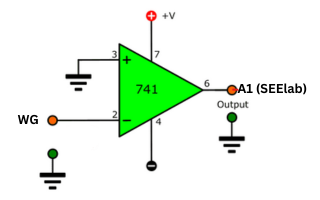</p>***

### Loading the txt files

In [ ]:
data_500 = np.loadtxt('CAL_500.txt')
data_1000 = np.loadtxt('CAL_1000.txt')
data_2000 = np.loadtxt('CAL_2000.txt')

### Plotting the Data

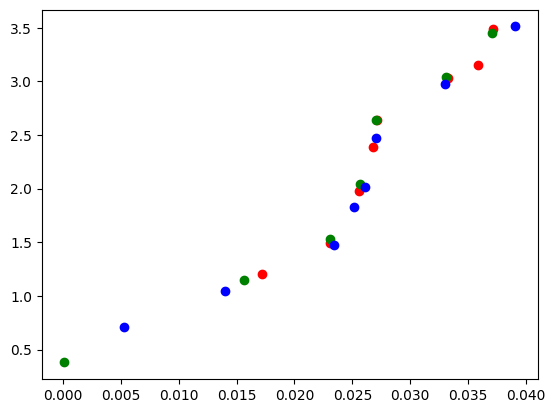

In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(data_500[:,0], data_500[:,1], color='r',label='500Hz')
plt.scatter(data_1000[:,0], data_1000[:,1], color='g',label='1000Hz')
plt.scatter(data_2000[:,0], data_2000[:,1], color='b',label='2000Hz')






# plt.title('Calibration of the Lock-in Amplifier')
# plt.xlabel(r'Input Voltage $V_{in}$ (V)')
# plt.ylabel(r'Output Voltage $V_{out}$ (V)')
# plt.grid()
# plt.legend()
# plt.show()
